# Robustness, Analysis

In [2]:
import sys
sys.path.insert(0, '../../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle

from qiskit.quantum_info import DensityMatrix, random_unitary
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm

from loss_functions import *
from optimization import *
from quantum_channel import *
from kraus_channels import *
from lindblad_channels import *
from quantum_tools import *
from experimental import *
from spam import *

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=4)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

plt.rcParams["figure.autolayout"] = True

## Plot Channel Fidelity

In [3]:
[[channel_target1],
 [model1, model2, model3]]= loader("data/"+"atypical_maps_robustness.model")

[[channel_target2],
 [model4, model5, model6]]= loader("data/"+"atypical_maps_robustness2.model")

In [4]:
loss_train_list1 = []
loss_val_list1 = []
for model in [model1, model2, model3]:
    loss_train_list1.append(-np.array(model.logger.loss_train_list))
    loss_val_list1.append(-np.array(model.logger.loss_val_list))

loss_train_list2 = []
loss_val_list2 = []
for model in [model4, model5, model6]:
    loss_train_list2.append(-np.array(model.logger.loss_train_list))
    loss_val_list2.append(-np.array(model.logger.loss_val_list))


C:\Users\krisw\AppData\Local\Temp\ipykernel_6832\863593963.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("figures/atypical_maps_robustness.pdf", bbox_inches='tight')
C:\Users\krisw\AppData\Local\Temp\ipykernel_6832\863593963.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("figures/atypical_maps_robustness.pdf", bbox_inches='tight')
c:\Program Files\Anaconda3\envs\env_qiskit\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


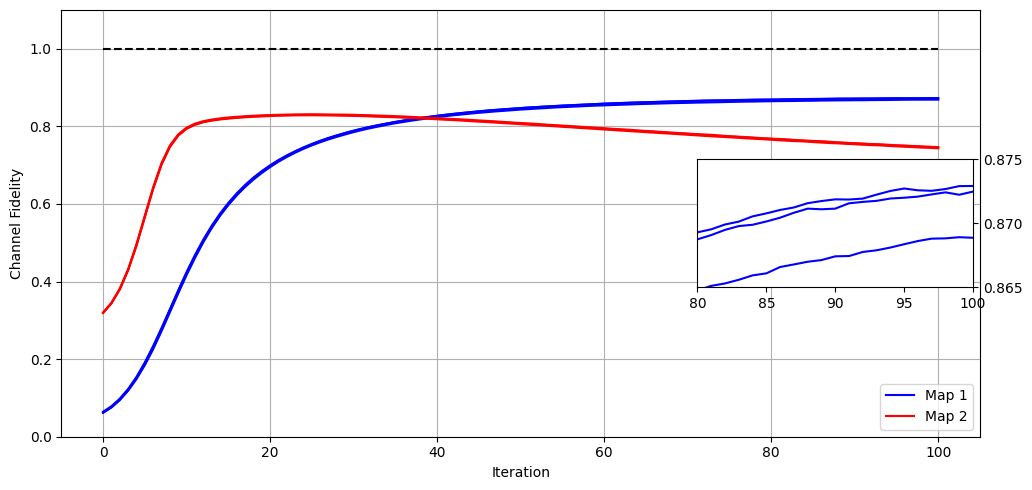

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Assuming 'loss_val_list' is a list containing three lists of loss values
# loss_val_list = [loss_values_map1, loss_values_map2, loss_values_map3]

plt.figure(figsize=(10,5))
plt.plot(loss_val_list1[0], label="Map 1", color="blue")
plt.plot(loss_val_list1[1], color="blue")	
plt.plot(loss_val_list1[2], color="blue")
plt.plot([1]*len(loss_val_list1[0]), color="black", linestyle="--")

plt.plot(loss_val_list2[0], label="Map 2", color="red")
plt.plot(loss_val_list2[1], color="red")
plt.plot(loss_val_list2[2], color="red")

plt.xlabel("Iteration")
plt.ylabel("Channel Fidelity")
plt.legend()
plt.ylim(0, 1.1)
plt.grid()

# Create an inset with zoom
ax = plt.gca()  # get current axes
axins = inset_axes(ax, width="30%", height="30%", loc="right")
axins.plot(loss_val_list1[0], color="blue")
axins.plot(loss_val_list1[1], color="blue")
axins.plot(loss_val_list1[2], color="blue")
axins.plot(loss_val_list2[0], color="red")
axins.plot(loss_val_list2[1], color="red")
axins.plot(loss_val_list2[2], color="red")



# Specify the limits for the inset axes
x1, x2, y1, y2 = 80, 100, 0.865, 0.875  # these limits can be adjusted as needed
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

# Apply the same style for the inset as the main plot for consistency
axins.yaxis.tick_right()

plt.savefig("figures/atypical_maps_robustness.pdf", bbox_inches='tight')